# Uçuş Varış Gecikmesi Tahmin Modeli

Bu projede  bir uçuşun değişkenlere bağlı olarak varışta ne kadar gecikeceğinin tahmin edilmesi amaçlanmaktadır. Bu bir regresyon problemidir ve gözetimli öğrenme algoritmaları kullanılacaktır.

Veri Setinde Bulunan Özellikler (Features):

'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'

Kullanılan Kütüphaneler

pandas
numpy
matplotlib
seaborn
scikit-learn

# Veri Setinin Yüklenmesi
Veri seti CSV formatında olup,'Yıl', 'Ay', 'Ayın Günü', 'Haftanın Günü', 'Uçuş Saati', 'Tahmini Kalkış Vakti', 'Varış Saati', 'CRS Ertesi Saati', 'Benzersiz Taşıyıcı', 'Uçuş Saati', 'Kuyruk Saati', 'Gerçek Geçen Saat', 'Tahmini Uçuş Süresi', 'Hava Süresi', 'Varış Gecikmesi', 'Uçuş Gecikmesi', 'Menşei', 'Varış', 'Mesafe', 'Taksi Girişi', 'Taksi Çıkışı', 'İptal Edildi', 'İptal Kodu', 'Yönlendirildi', 'Taşıyıcı Gecikmesi', 'Hava Gecikmesi', 'NAS Gecikmesi', 'Güvenlik Gecikmesi', 'Uçak Gecikmesi'içermektedir.

In [1]:
import pandas as pd

df = pd.read_csv("/Users/sehersavas/Desktop/DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# KEŞİFSEL VERİ ANALİZİ

In [2]:
print(df.head())
print(f"\nVeri kümesinin boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
print("\nSütunlar:")
print(df.columns.tolist())
print("\nVeri tipleri:")
print(df.dtypes)
print("\nEksik veri sayısı:")
print(df.isnull().sum())

df.describe(include='all' )

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1936758,...,1.929648e+06,1.936303e+06,1.936758e+06,1936758,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,...,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,NaN,...,6.812975e+00,1.823220e+01,3.268348e-04,NaN,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,NaN,...,5.273595e+00,1.433853e+01,1.807562e-02,NaN,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,...,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,...,6.000000e+00,1.400000e+01,0.000000e+00,NaN,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,...,8.000000e+00,2.100000e+01,0.000000e+00,NaN,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01


Veri setinde toplam 1.936.758 satır ve 30 sütun bulunmaktadır. Yaklaşık 690.000 satırda eksik veri vardır, eksik veri temizleme işlemi gerekmektedir. UniqueCarrier (hava yolu kodu), TailNum (uçak kuyruk numarası), Origin (kalkış havaalanı kodu) ,Dest (varış havaalanı kodu),CancellationCode (iptal sebebi) (object), geri kalan veriler sayısal formdadır. Veri Ön İşleme esnasında gerekli dönüşümler yapılacaktır.

# Veri Temizliği - Eksik Veri Olan Satırların Temizlenmesi

In [3]:
df_cleaned = df.dropna()

print("Yeni veri kümesinin boyutu:", df_cleaned.shape)


Yeni veri kümesinin boyutu: (1247486, 30)


Verisetinde eksik veri bulunan satırlar temizlendikten sonra veriseti 1.247.486 satır ve 30 sütundan oluşmaktadır.

# Keşifsel Veri Analizi- Hedef Değişkene ait Bilgilerin Edinilmesi

In [4]:
print("ArrDelay İstatistikleri:\n", df_cleaned['ArrDelay'].describe())


ArrDelay İstatistikleri:
 count    1.247486e+06
mean     6.329104e+01
std      6.075380e+01
min      1.500000e+01
25%      2.600000e+01
50%      4.300000e+01
75%      7.900000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64


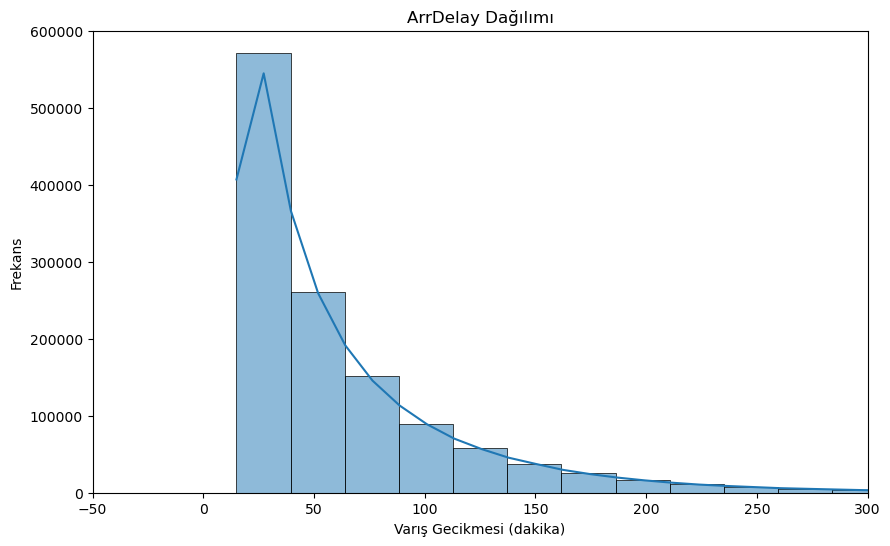

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ArrDelay'], bins=100, kde=True)
plt.title("ArrDelay Dağılımı")
plt.xlabel("Varış Gecikmesi (dakika)")
plt.ylabel("Frekans")
plt.xlim(-50, 300)  # Aşırı uç değerleri dışarıda bırakmak için
plt.show()


Hedef değişken olarak belirlenecek olan "ArrDelay" sütunun istatistik bilgilerine bakıldığında;

Ortalama Gecikme (mean): 63.29 dakika — oldukça yüksek bir gecikme ortalaması olduğu sistematik bir gecikme durumu olabileceği,

Standart Sapma (std): 60.75 dakika — veri çok dağıldığı bazı uç değerler olabileceği,

Minimum Gecikme (min): 15 dakika — verisetinde sadece gecikmeli uçuşların olduğu,

Medyan (50%): 43 dakika — çoğu uçuşun ortalamaya göre biraz daha az geciktiği,

%75'lik dilim (75%): 79 dakika — uçuşların %25’lik bir kesiminin 79 dakikadan fazla geciktiği,

Maksimum (max): 2461 dakika (!) — Max değerin  aykırı (outlier) olduğu,

tespit edilmiştir.


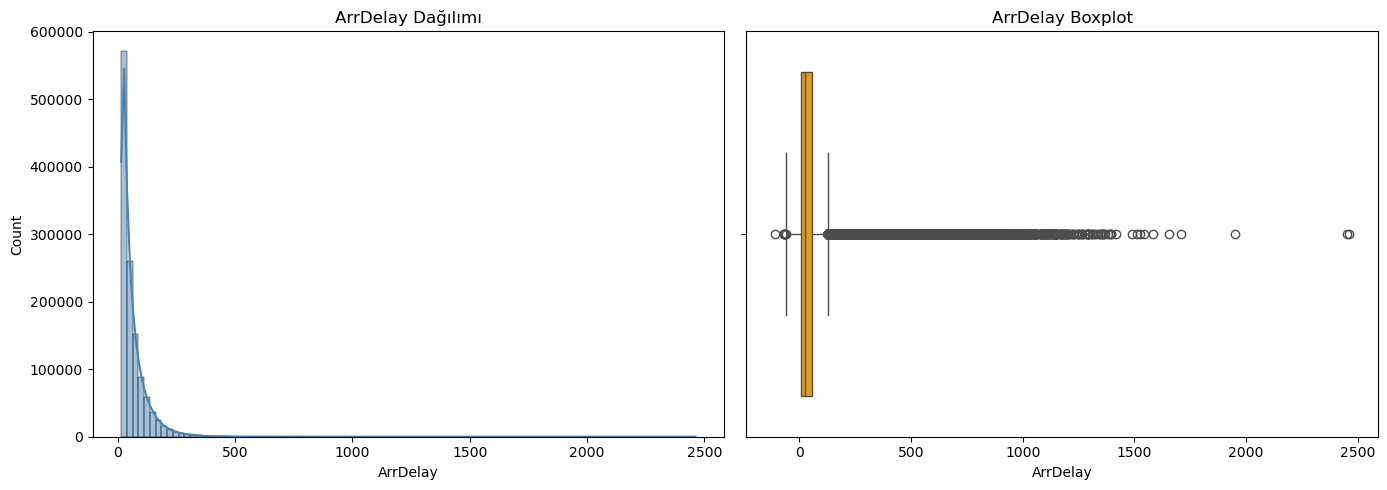

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['ArrDelay'], bins=100, kde=True, color='steelblue')
plt.title('ArrDelay Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['ArrDelay'], color='orange')
plt.title('ArrDelay Boxplot')

plt.tight_layout()
plt.show()



ArrDelay değişkeninin histogram grafiğine bakıldığında çoğu gecikmenin 0-200 dakika arasında olduğu ancak 200 dakikadan fazla olan tekil durumların olduğu bu nedenle aykırı değerler olduğu gözlenmiştir.Boxplot grafiğine bakıldığında ise 2500 dakikaya kadar devam eden uç değerler olduğu görülmektedir.

Çok büyük gecikmelerin sayısı (> 200 dakika): 10685


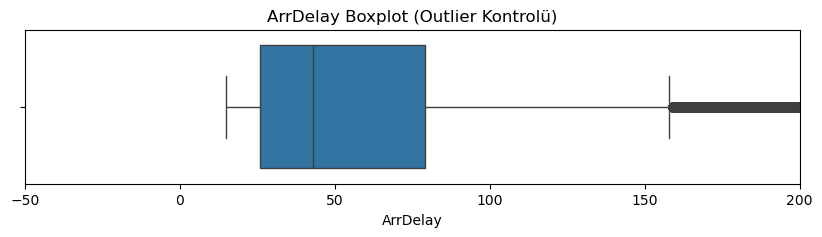

In [7]:
print("Çok büyük gecikmelerin sayısı (> 200 dakika):", (df_cleaned['ArrDelay'] > 300).sum())
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned['ArrDelay'])
plt.title("ArrDelay Boxplot (Outlier Kontrolü)")
plt.xlim(-50, 200)
plt.show()


ortalama gecikme 63.29 dakika olarak tespit edilmişken 200 dakikanın üzerinde 10.685 değer olduğu görülmüştür, bu değerler uç değerlerdir, modelin öğrenmesini olumsuz yönde etkileyebilirler. Veri temizleme aşamasında temizlenecektir.

In [8]:
correlations = df_cleaned.corr(numeric_only=True)['ArrDelay'].sort_values(ascending=False)
print("ArrDelay ile korelasyonu yüksek değişkenler:\n", correlations.head(15))


ArrDelay ile korelasyonu yüksek değişkenler:
 ArrDelay             1.000000
DepDelay             0.950323
CarrierDelay         0.501777
LateAircraftDelay    0.478127
NASDelay             0.387609
WeatherDelay         0.264604
TaxiOut              0.208441
TaxiIn               0.116314
DepTime              0.093979
ActualElapsedTime    0.083738
FlightNum            0.035803
CRSElapsedTime       0.031566
AirTime              0.027509
CRSArrTime           0.024998
CRSDepTime           0.017093
Name: ArrDelay, dtype: float64


hedef değişken olarak seçilecek olan "ArrDelay" değişkeninin 30 özellik arasından en yüksek korelasyonun olduğu 15 özellik sıralanmıştır. "ArrDelay"'in kendisi ile olan korelasyonu dikkate alınmaz. Kalan değerler arasında DepDelay  0.950323 hedef değişken ile ciddi derecede doğrusal ilişkilidir, CarrierDelay,LateAircraftDelay,NASDelay hedef değişken ile orta derecede doğrusal ilişkilidir,WeatherDelay, TaxiOut, TaxiIn hedef değişken ile zayıf derecede de olsa doğrusal ilişkilidir. Kalan özellik sütunlarının korelasyon değerleri modelin anlamlı tahminde bulunmasına engel olabileceğinden ilerleyen basamaklarda veri temizliği aşamasında bu sütunlar verisetinden temizlenecektir.            

# Keşifsel Veri Analizi- Hedef Değişken ile Yüksek Korelasyonlu Özelliklerin İlişkisi

/var/folders/zg/bjz8f2zx4xl0lpls1crqjl6w0000gn/T/ipykernel_28705/4249973563.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dep_group = df_cleaned.groupby('DepDelay_bin')['ArrDelay'].mean().reset_index()


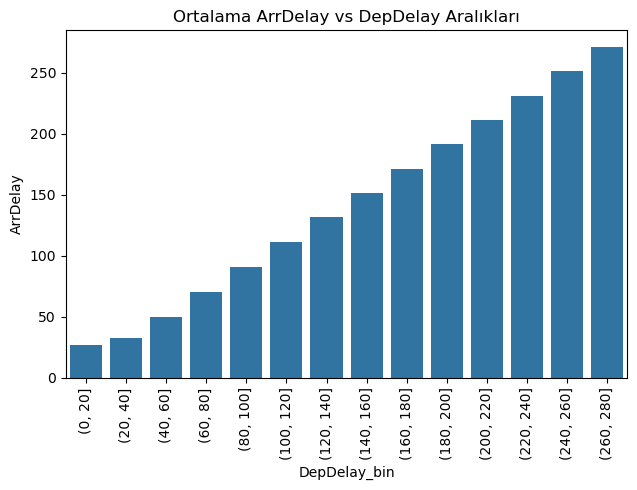

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df_cleaned.copy()

df_cleaned['DepDelay_bin'] = pd.cut(df_cleaned['DepDelay'], bins=range(0, 300, 20))
dep_group = df_cleaned.groupby('DepDelay_bin')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=dep_group, x='DepDelay_bin', y='ArrDelay')
plt.title('Ortalama ArrDelay vs DepDelay Aralıkları')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



Grafiğe bakıldığında ArrDelay ile DepDelay verileri arasında doğrusal ve güçlü bir ilişki olduğu görülmektedir.

/var/folders/zg/bjz8f2zx4xl0lpls1crqjl6w0000gn/T/ipykernel_28705/2640024477.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_group = df_cleaned.groupby('CarrierDelay_bin')['ArrDelay'].mean().reset_index()


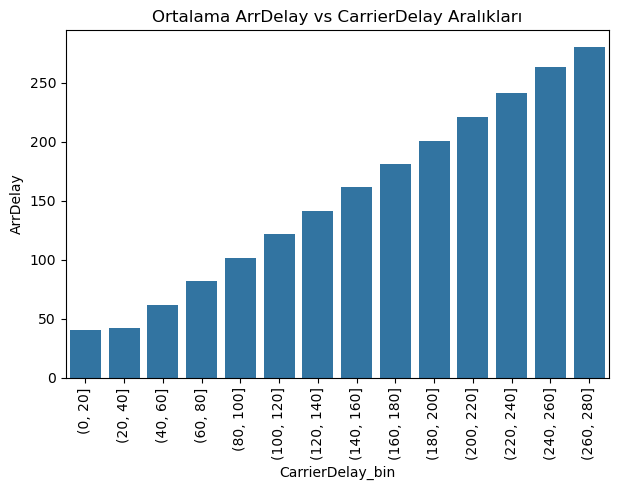

In [10]:


# CarrierDelay - ArrDelay
df_cleaned['CarrierDelay_bin'] = pd.cut(df_cleaned['CarrierDelay'], bins=range(0, 300, 20))
carrier_group = df_cleaned.groupby('CarrierDelay_bin')['ArrDelay'].mean().reset_index()


plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 2)
sns.barplot(data=carrier_group, x='CarrierDelay_bin', y='ArrDelay')
plt.title('Ortalama ArrDelay vs CarrierDelay Aralıkları')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


/var/folders/zg/bjz8f2zx4xl0lpls1crqjl6w0000gn/T/ipykernel_28705/921405888.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_group = df_cleaned.groupby('LateAircraftDelay_bin')['ArrDelay'].mean().reset_index()


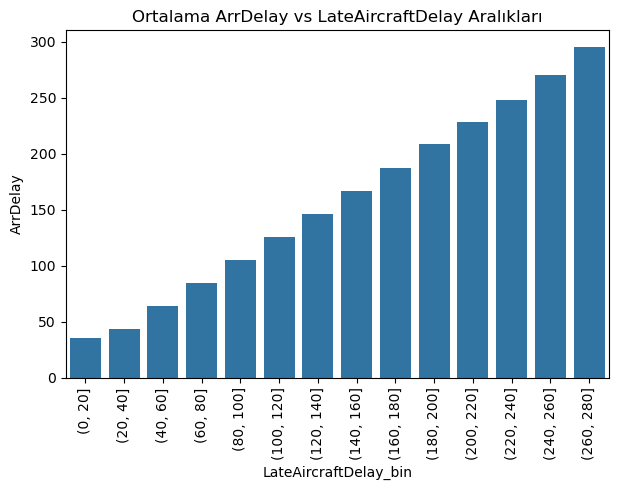

In [11]:

# LateAircraftDelay - ArrDelay
df_cleaned['LateAircraftDelay_bin'] = pd.cut(df_cleaned['LateAircraftDelay'], bins=range(0, 300, 20))
late_group = df_cleaned.groupby('LateAircraftDelay_bin')['ArrDelay'].mean().reset_index()


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.barplot(data=late_group, x='LateAircraftDelay_bin', y='ArrDelay')
plt.title('Ortalama ArrDelay vs LateAircraftDelay Aralıkları')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Veri Temizliği- Hedef Değişken ile Korelasyonu Düşük Olan Sütunların Temizlenmesi

In [12]:
columns_to_keep = ['DepDelay', 'CarrierDelay', 'LateAircraftDelay', 
                   'NASDelay', 'WeatherDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay']

df_cleaned = df.dropna()

df_cleaned = df_cleaned[columns_to_keep]

print("Kalan sütunlar:")
print(df_cleaned.columns.tolist())

print("Yeni df_cleaned boyutu:", df_cleaned.shape)
print("Eksik veri var mı?:", df_cleaned.isnull().sum().sum())



Kalan sütunlar:
['DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay']
Yeni df_cleaned boyutu: (1247486, 8)
Eksik veri var mı?: 0


Hedef değişken ve Hedef Değişken ile Korelasyonu yüksek olan 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay' dışındaki sütunlar, modelin tahminleme performansını düşürebileceği için temizlenmiştir, eksik veri temizleme işleme yinelenmiş, eksik veri olup olmadığı tekrar kontrol edilmiştir.

In [13]:
print("Kalan sütunların veri türleri:")
print(df_cleaned.dtypes)


Kalan sütunların veri türleri:
DepDelay             float64
CarrierDelay         float64
LateAircraftDelay    float64
NASDelay             float64
WeatherDelay         float64
TaxiOut              float64
TaxiIn               float64
ArrDelay             float64
dtype: object


kalan değişkenlerin hepsi ondalıklı sayılardan oluşmaktadır, model regresyon problemi üzerine olacağından bu aşamada veri formatının dönüştürülmesi gerekli görülmemektedir.

eksik veriler tekrar temizlendi, y hedef değişkeni "ArrDelay" olarak, geri kalan 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay'değişkenleri x bağımsız değişkeni olarak tanımlandı. x değişkenleri ölçeklendirildi.

# Veri Temizliği - Hedef Değişkendeki Uç Değerlerin Temizlenmesi

In [14]:
threshold = 200
df_filtered = df_cleaned[df_cleaned['ArrDelay'] <= threshold]

print("Yeni df_filtered boyutu:", df_filtered.shape)
print("Eksik veri var mı?:", df_filtered.isnull().sum().sum())



Yeni df_filtered boyutu: (1204914, 8)
Eksik veri var mı?: 0


# Veri Ön İşleme - Hedef Değişkeni Kategorilere Ayırma

Modelde logistic regression kullanılması planlandığı için hedef değişken if, elif ve else fonksiyonları kullanılarak 4 sınıfa bölünmüştür. 

ArrDelay değeri;

0 veya 0'dakikadan küçükse veri 0 sınıfına,

0 dakikadan büyük 50 dakikadan küçük veya 50 dakikaysa 1 sınıfına,

50 dakikadan büyük 90 dakikadan küçük veya 90 dakika ise 2 sınıfına, 

90 dakikadan büyük ise 3 sınıfına, 

ait olacaktır. 

"ArrDelayClass" adında yeni bir sınıf oluşturulmuştur.

In [15]:
def delay_class_4(x):
    if x <= 0:
        return 0
    elif x <= 50:
        return 1
    elif x <= 90:
        return 2
    else:
        return 3

df_filtered = df_filtered.copy()
df_filtered['ArrDelayClass'] = df_filtered['ArrDelay'].apply(delay_class_4)


# Veri Ön İşleme - x ve y değişkenlerinin tanımlanması ve normalizasyonu
Daha önceden temizlenen değişkenler karışıklık olmaması için yeniden tanımlanmış, 

ardından x bağımsız değişkenleri DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'TaxiOut', 'TaxiIn' olarak,
y hedef değişkeni ise "ArrDelayClass" olarak tanımlanmıştır.

Verilerin değerlerinin türleri farklı olabileceğinden 0,1 aralığında normalize edilmiştir.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

features = ['DepDelay', 'CarrierDelay', 'LateAircraftDelay', 
            'NASDelay', 'WeatherDelay', 'TaxiOut', 'TaxiIn']

x = df_filtered[features]
y = df_filtered['ArrDelayClass']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=features)




# Veri Ön İşleme - Eğitim-Test Verisi Ayrılması

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_scaled_df, y, test_size=0.2, random_state=42, stratify=y )


Makine öğrenmesi kullanılarak yapılacak regresyon modelinin eğitilmesi için verisetindeki hem bağımsız hem de hedef değişken verilerin %80'i eğitim verisi, modelin başarısının test edilmesi için verisetindeki verilerin %20'si test verisi olarak bölünmüştür.

# Model Oluşturulması - LOGISTIC REGRESSION KULLANILARAK MODELİN OLUŞTURULMASI

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


Logistic Regression kullanılarak model oluşturulmuş ve tahminleme uygulanmıştır

# Modelin Test Edilmesi 


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy', n_jobs=-1)

print("Cross Validation Doğruluk Skorları:", cv_scores)
print("Ortalama Doğruluk:", cv_scores.mean())
print("Standart Sapma:", cv_scores.std())



Cross Validation Doğruluk Skorları: [0.98967147 0.99043916 0.99010304 0.98946399 0.98970048]
Ortalama Doğruluk: 0.9898756258329222
Standart Sapma: 0.0003495967047013123


Cross validation sonuçlarına göre modelin doğruluk oranları beş farklı katmanda oldukça tutarlı ve yüksek seyrettiği, doğruluk skorlarının %98.96 ile %99.04 arasında değişmekte olduğu, ortalama doğruluk %98.99 seviyesinde olduğu, standart sapmanın çok düşük olması (0.00035 civarı) farklı katmanlardaki performansın birbirine çok yakın olduğu, yani modelin kararlı ve genelleme kapasitesinin yüksek olduğu gözlenmektedir. Bu verilerle aşırı öğrenme (overfitting) riskinin düşük olduğu söylenebilir. 

# Modelin Hiperparametre Optimizasyonu Yapılarak Yeniden Uygulanması

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__max_iter': [200]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(x, y)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)


En iyi parametreler: {'logisticregression__C': 10, 'logisticregression__max_iter': 200}
En iyi doğruluk: 0.9965258930591936


Lojistik regresyon modelinin performansını artırmak için hiperparametre optimizasyonu yapıldı. Öncelikle veri ölçeklendirme için MinMaxScaler ve sınıflandırma için LogisticRegression yer alan bir pipeline oluşturuldı. Ardından, modelin önemli iki parametresi olan C (düzenleme gücü) ve max_iter (maksimum iterasyon sayısı) için farklı değerlerin denenmesi amacıyla bir parametre ızgarası (param_grid) belirlendi. GridSearchCV fonksiyonu, bu parametre kombinasyonlarını 5 katlı cross-validation (çapraz doğrulama) ile test edilerek, her biri için modelin doğruluk (accuracy) skoru hesaplandı ve en iyi sonucu veren parametreler belirlenmesi amaçlanmıştır.

Sonuç olarak, modelin en iyi doğruluk değerini C=10 ve max_iter=200 parametreleriyle elde ettiği görüldü. Bu doğruluk oranı %99.65 gibi çok yüksek bir değeri göstermekte olup modelin verideki sınıfları neredeyse doğru şekilde tahmin ettiği tespit edilmiştir.

C=10 değeri, modelin aşırı uyuma (overfitting'i önlemeye) daha az ağırlık verip, veriye daha esnek uyum sağladığını ifade etmektedir. max_iter=200 ise modelin eğitim sürecinde yeterli sayıda iterasyon yaparak parametreleri optimize ettiğini göstermektedir.

Bu yüksek doğruluk seviyesi, modelin sınıflandırma başarısının çok iyi olduğunu gösterse de, aşırı uyum (overfitting) riskinin olup olmadığını kontrol etmek gerekmektedir. Bu nedenle diğer performans metrikleri (precision, recall, f1-score) da incelenecektir.

# En iyi Performans Gösteren Modelin Değerlendirilmesi

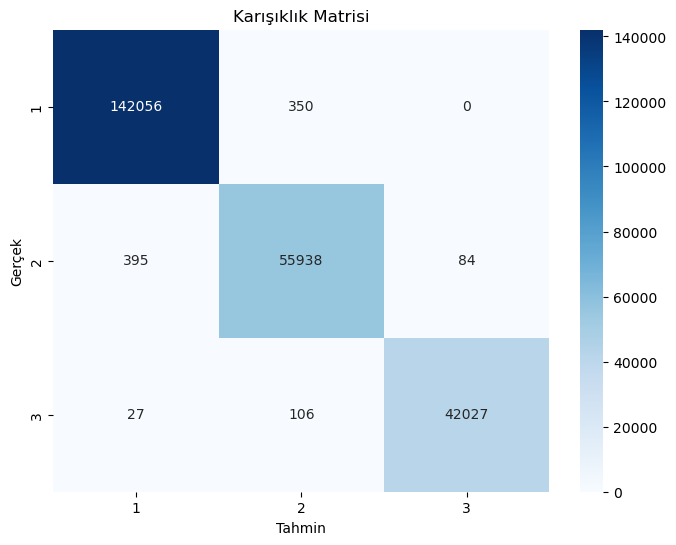

Doğruluk (Accuracy): 0.9960080171630364
Kesinlik (Precision) (macro): 0.995652481470341
Duyarlılık (Recall) (macro): 0.9952990802595668
F1 Skoru (macro): 0.9954756334827012

Classification Report:

              precision    recall  f1-score   support

           1     0.9970    0.9975    0.9973    142406
           2     0.9919    0.9915    0.9917     56417
           3     0.9980    0.9968    0.9974     42160

    accuracy                         0.9960    240983
   macro avg     0.9957    0.9953    0.9955    240983
weighted avg     0.9960    0.9960    0.9960    240983



In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Performans metrikleri
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Kesinlik (Precision) (macro):", precision_score(y_test, y_pred, average='macro'))
print("Duyarlılık (Recall) (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Skoru (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Hiperparametre optimizasyonu sonucu elde edilen en iyi modeli (best_model) seçildi, test veri setindeki özelliklerden (x_test) tahminler yapıldı ve bu tahminlerle gerçek test hedef değerlerini (y_test) karşılaştırıldı. Tahminlerin doğruluğunu anlamak için karışıklık matrisi (confusion_matrix) oluşturuldu ve bu matris görsel olarak seaborn kütüphanesiyle ısı haritası şeklinde gösterildi.

Daha önce hedef değişken (0,1,2,3) olmak üzere 4 sınıfa ayrılmıştı ancak 0 sınıfına ait veri olmadığından karışıklık ısı haritasında temsil edilmediği düşünülmektedir.

Karışıklık haritasına bakıldığında ;
sınıf 1 için 350 örneğin 2 olarak hatalı tahmin edildiği, 3 olarak hatalı tahmin olmadığı,
sınıf 2 için 395 örneğin 1 olarak hatalı , 84 örneğin 3 olarak hatalı tahmin edildiği,
sınıf 3 için 27 örneğin 1 olarak hatalı , 106 örneğin 2 olarak hatalı tahmin edildiği,
gözlenmiştir.

Karışıklık ısı haritası çıktısına bakılarak en başarılı performansın sınıf 1 tahminlemesinde olabileceği, en az başarılı performansın sınıf 2 tahminlemesinde olabileceği gözlenmekte olup modelin performansına ilişkin kesin yorum yapılabilmesi için diğer metriklerin de değerlendirilmesi gerekmektedir.

Ek olarak model performansını ölçmek için doğruluk (accuracy), kesinlik (precision), duyarlılık (recall) ve F1 skoru gibi temel sınıflandırma metrikleri hesaplanmış olup her sınıf için ayrıntılı değerlendirme raporu (classification_report) yazdırıldı. Bu sonuçlara bakıldığında;
Sınıf 1 için precision (kesinlik) ve recall (duyarlılık) %99.7 civarında,
Sınıf 2 için precision ve recall biraz daha düşük (%99.1),
Sınıf 3 için precision ve recall yine %99.8 seviyesinde,
gözlenmiş olup en yüksek performansı sınıf 3'ün verdiği görülmektedir. 

Macro average değerleri, her sınıfın eşit ağırlıklı ortalamasını temsil etmekte olup yaklaşık %99.5 seviyesindedir.

Weighted average’ın accuracy ile neredeyse aynı çıkması, modelin sınıf dağılımını başarıyla öğrenebildiğini göstermekte olup dengesizliğin performansa olumsuz etki etmediği söylenebilir.


# Modelin Matematiksel Olarak İfade Edilmesi ve Özelliklerin Öneminin Değerlendirilmesi

In [23]:

logreg = best_model.named_steps['logisticregression']


coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]


feature_names = x.columns


equation = f"logit(P) = {intercept:.4f}"
for coef, name in zip(coefficients, feature_names):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.4f}*{name}"

print("Model Denklemi:")
print(equation)


Model Denklemi:
logit(P) = 45.0321 - 8.0564*DepDelay - 140.2531*CarrierDelay - 140.2840*LateAircraftDelay - 141.9156*NASDelay - 140.4070*WeatherDelay - 4.1773*TaxiOut - 6.5670*TaxiIn


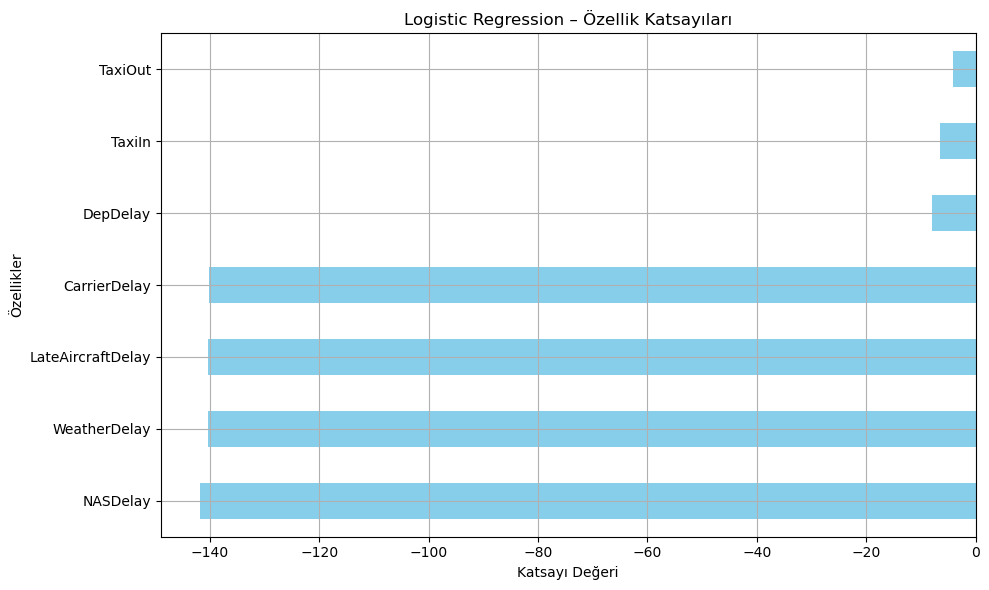

In [24]:

coef_series = pd.Series(coefficients, index=feature_names)

coef_series_sorted = coef_series.sort_values()

plt.figure(figsize=(10, 6))
coef_series_sorted.plot(kind='barh', color='skyblue')
plt.title("Logistic Regression – Özellik Katsayıları")
plt.xlabel("Katsayı Değeri")
plt.ylabel("Özellikler")
plt.grid(True)
plt.tight_layout()
plt.show()


Daha önce hedef değişken - özellikler korelasyon incelemesi yapılmış olup model oluşturulup uygulandıktan sonra özelliklerin hedef değişkene olan etkisi görselleştirilmiştir. 
Grafik ve modelin matematiksel denklemi incelendiğinde bütün bağımsız değişkenlerin katsayılarının negatif olduğu görülmektedir, bu nedenle bağımsız değişkenlere ait değerler arttıkça kategorik olan hedef değişkenin yüksek gecikme sınıfına doğru gittiği anlama gelmektedir. Bir başka deyişle bağımsız değişkenler (gecikme nedenleri) arttıkça, uçuşun 0. sınıf (zamanında veya erken varış) ya da 1. sınıf (az gecikmeli) olma olasılığı düşmekte, uçuşun 2. veya 3. sınıfa (orta veya yüksek düzeyde gecikmeli) ait olma olasılığı artmaktadır.

NASDelay, LateAircraftDelay, CarrierDelay, WeatherDelay bağımsız değişkenlerin katsayılarının en yüksek olduğunu dolayısıyla uçuşun gecikme durumunu en çok bu değişkenlerin değerlerinin etkilediği görülmektedir.